# Data Engineering- Creating ETL pipepile
## Extract: Using Twitter API
## Transform: Using Python
## Load: Using Airflow hosted on AWS EC2 instance to store data into S3 bucket 

In [60]:
import tweepy #An easy-to-use Python library for accessing the Twitter API
import pandas as pd
import json
import boto
from datetime import datetime
import s3fs  #To access Amazon S3 bucket

In [8]:
#Twitter API keys
api_key = "QzzEvVEr7im2uDRarK6lfPCM6"
api_secret_key = "nMgmYKW1SwhUWsGK6awpb67g04RgMjlZkTNME3qFkiIXz7SwjW"

access_token = "1572249640845692931-PGVq0zQxsv7j0Cacu8ozRkKyD9sAj5"
access_token_secret = "pVUtm7K9K3LN1aXkKlqLrhUv47HyQK16FD7gxf2GgRinH"

Note: Twitter API Elevated acess required.

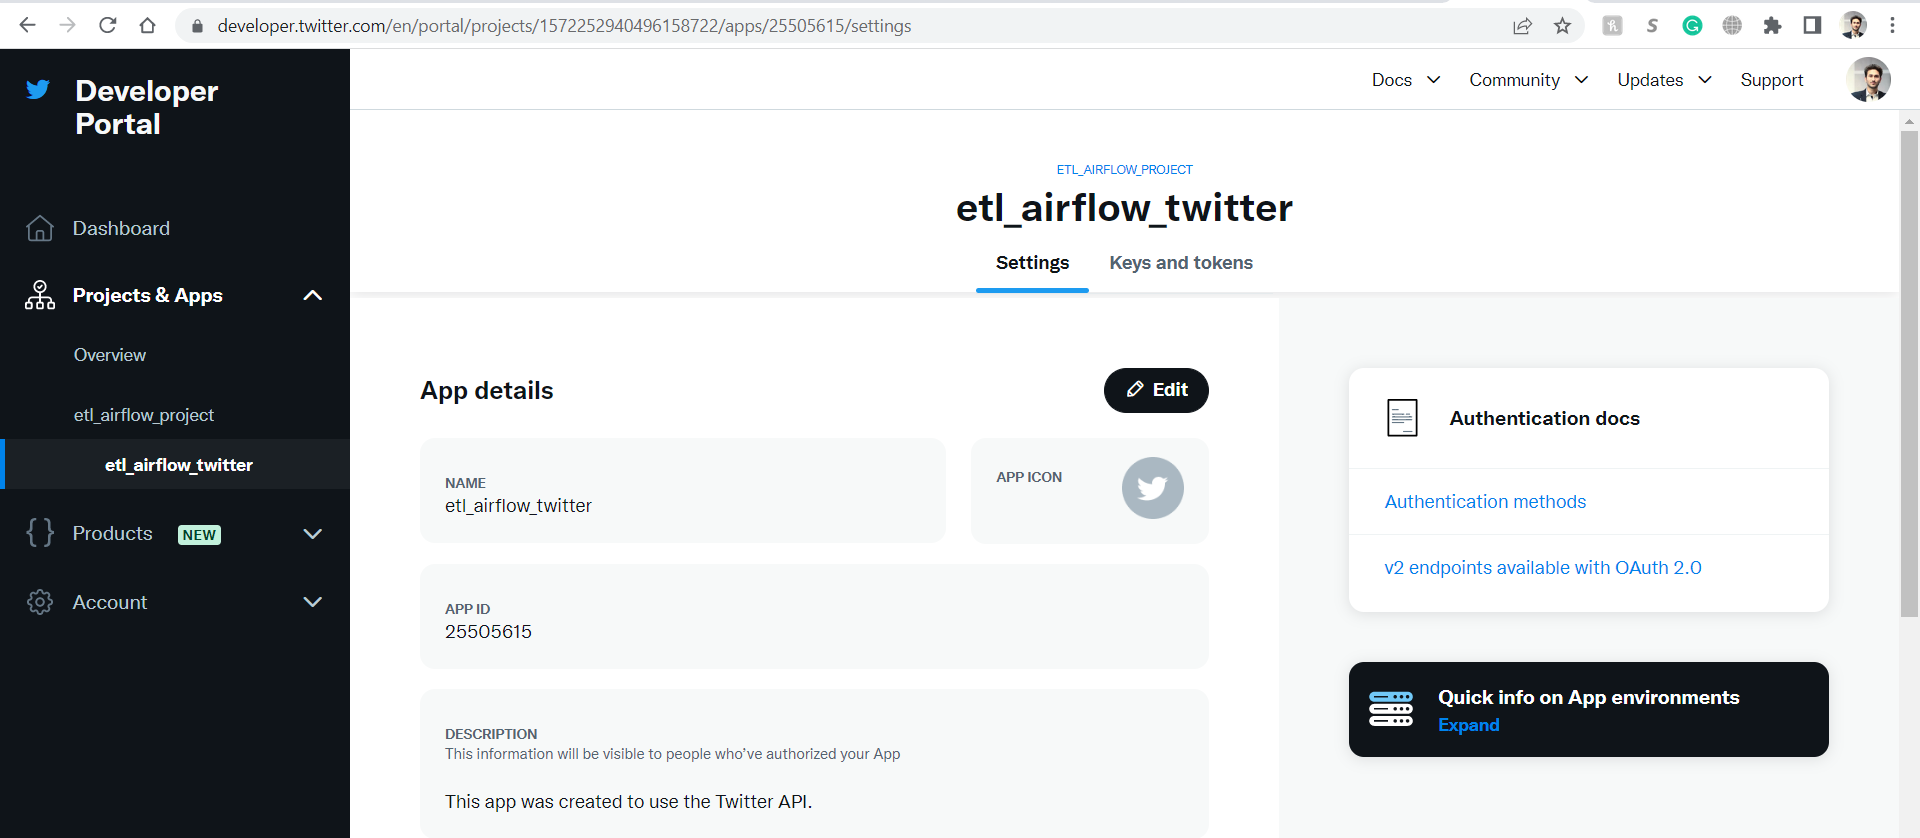

## Connecting our code and Twitter API
Twitter authentication

In [10]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

## Creating API object

In [13]:
api = tweepy.API(auth)

## Getting the most recent tweets

In [36]:
tweets = api.user_timeline(screen_name = '@elonmusk',
                           count =200, #max count allowed is 200 , to get most recent tweets
                           include_rts = False, #re tweets
                           tweet_mode = 'extended' # to keep full text otherwise only fisrt 140 works will be included
                          )

In [37]:
#print(tweets)               #gives data in json format and confirms that our connecton with twitter is succesful

## Transforming Json data into proper structure and creating a datafame

In [38]:
tweet_list = []
for tweet in tweets:
    text = tweet._json["full_text"] #use full_text to get the full tweet text along with tweet mode extended
    
    refinded_tweet = {"user" : tweet.user.screen_name,
                      'text' : text,
                      'favorite_count' : tweet.favorite_count, #how many people liked it
                      'retweet_count' : tweet.retweet_count,
                      'created_at' : tweet.created_at  #when was tweet created
                     }
    tweet_list.append(refinded_tweet) #appending dictionary into the list

In [39]:
df = pd.DataFrame(tweet_list)
df

,user,text,favorite_count,retweet_count,created_at
0,elonmusk,@BillyM2k @Austen Same,1740,106,2022-09-20 16:42:31+00:00
1,elonmusk,@BLKMDL3 @teslascope @johnkrausphotos Yes,1131,55,2022-09-20 13:03:48+00:00
2,elonmusk,"@ToscaMusk @kimbal Happy birthday bro, love you",10165,375,2022-09-20 12:50:21+00:00
3,elonmusk,"@teslascope @johnkrausphotos Yes, all US &amp;...",2650,293,2022-09-20 05:12:15+00:00
4,elonmusk,"@teslaownersSV @johnkrausphotos Note, Autopilo...",4749,435,2022-09-20 05:09:15+00:00
...,...,...,...,...,...
189,elonmusk,@AGiovanni_1 @culturaltutor Coming,1673,81,2022-08-28 13:27:05+00:00
190,elonmusk,@RenataKonkoly @culturaltutor Ares,1089,58,2022-08-28 13:26:40+00:00
191,elonmusk,@culturaltutor What do you call a Great Dane e...,2366,196,2022-08-28 13:22:40+00:00
192,elonmusk,Squeezing extra performance out of Falcon 9 – ...,35584,2589,2022-08-28 05:29:11+00:00


## For now storing data in local system as a csv file, later will move it to S3 bucket

In [31]:
df.to_csv("twitterdata.csv")

## Now I will create an EC2 instance, connect to it using command line and deploy Airflow on that

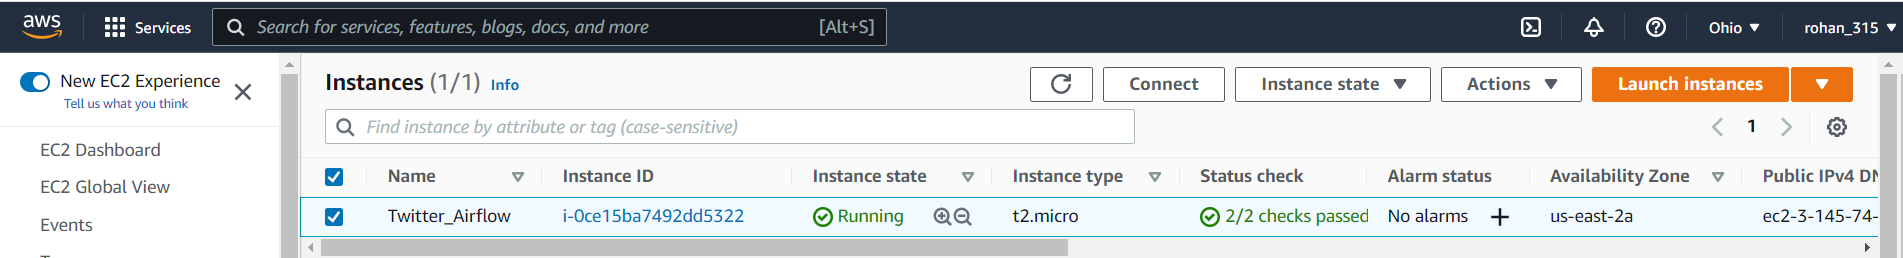


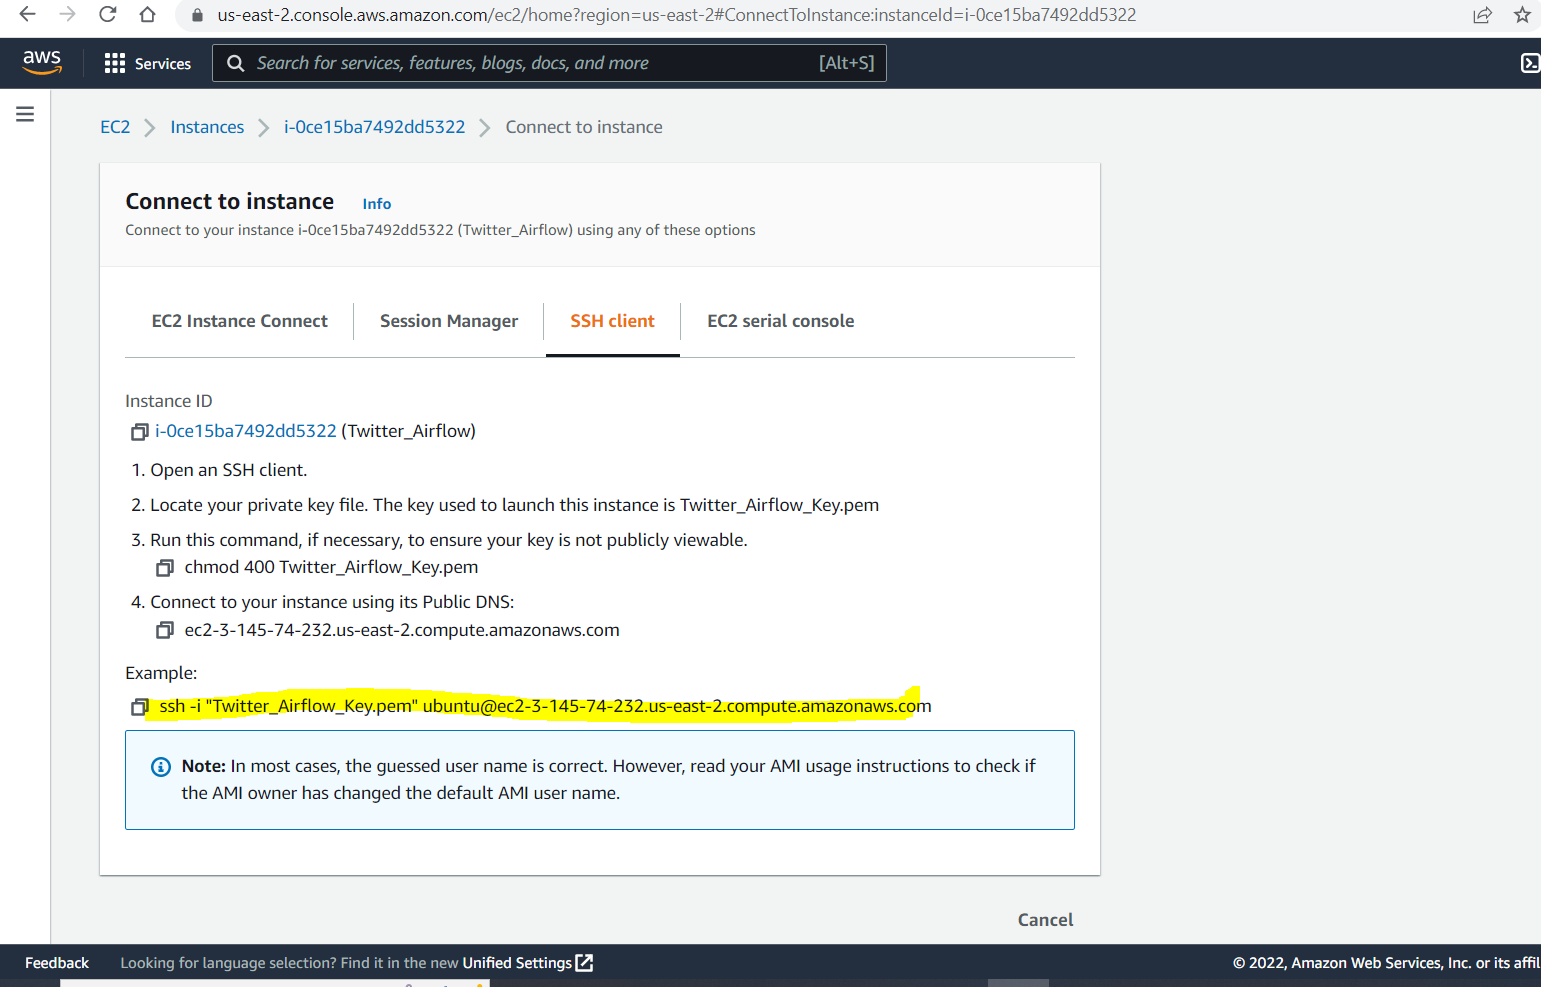

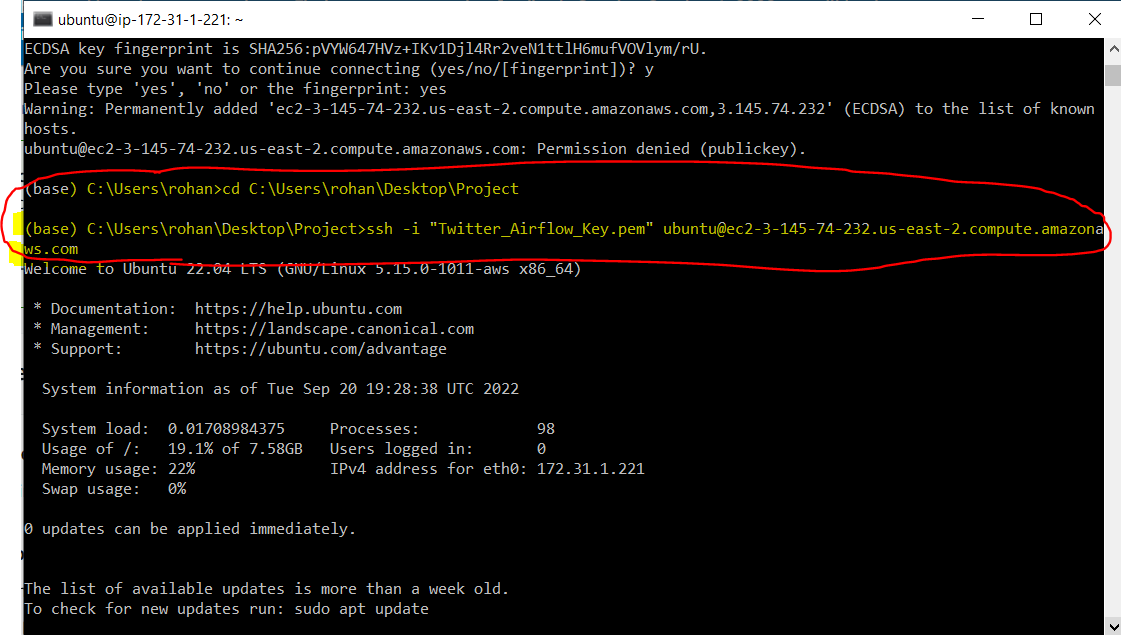

## Updating files on ubuntu machine and installing other required things:

sudo apt-get update     

sudo apt install python3-pip

sudo pip install apache-airflow

sudo pip install pandas 

sudo pip install s3fs

sudo pip install tweepy

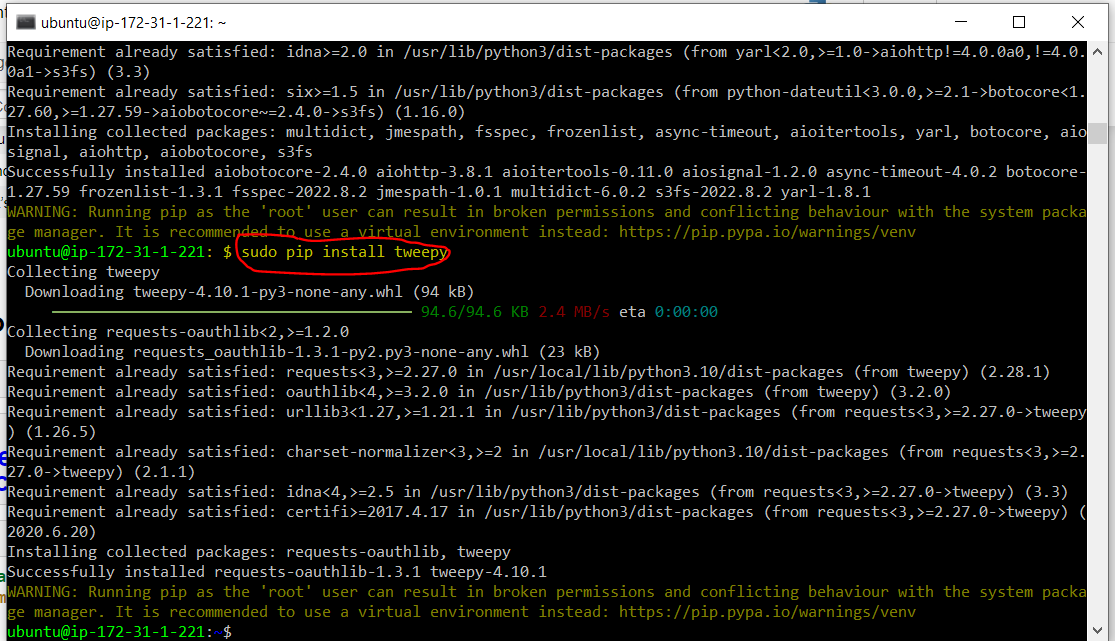

## Running Airflow Server

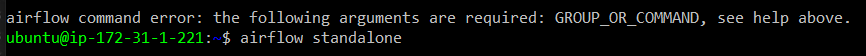

## Airflow is ready
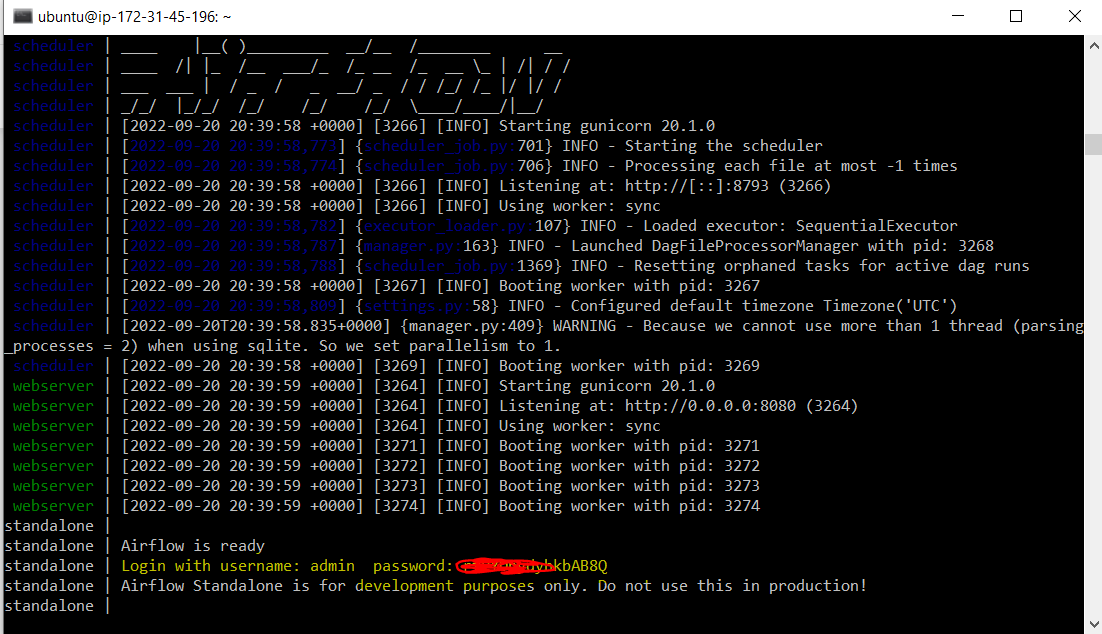

## Airflow login using public IP

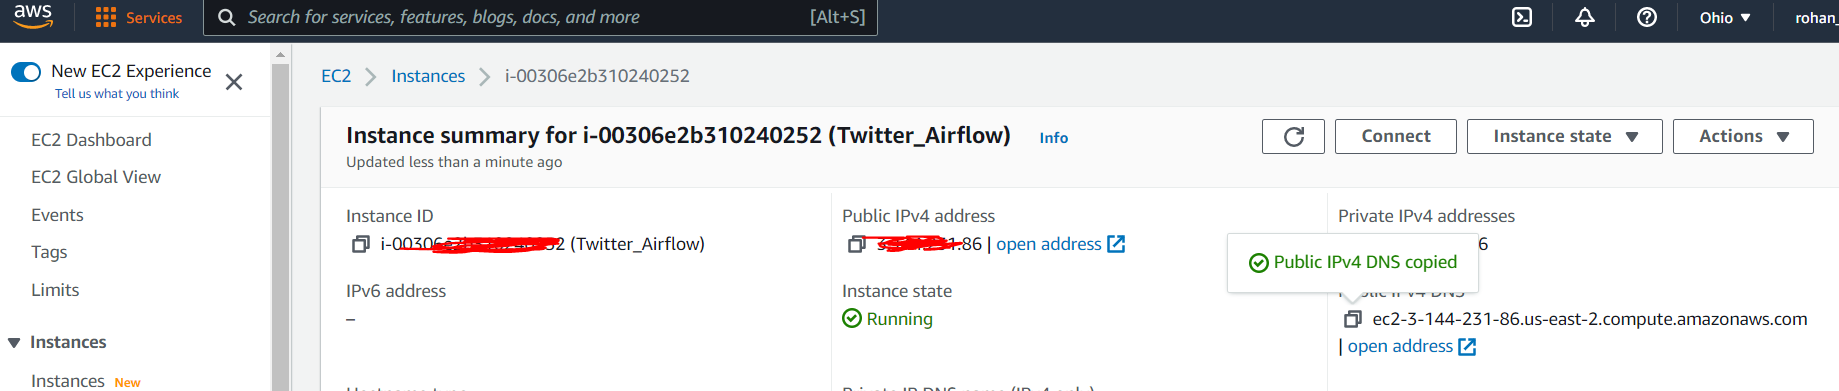

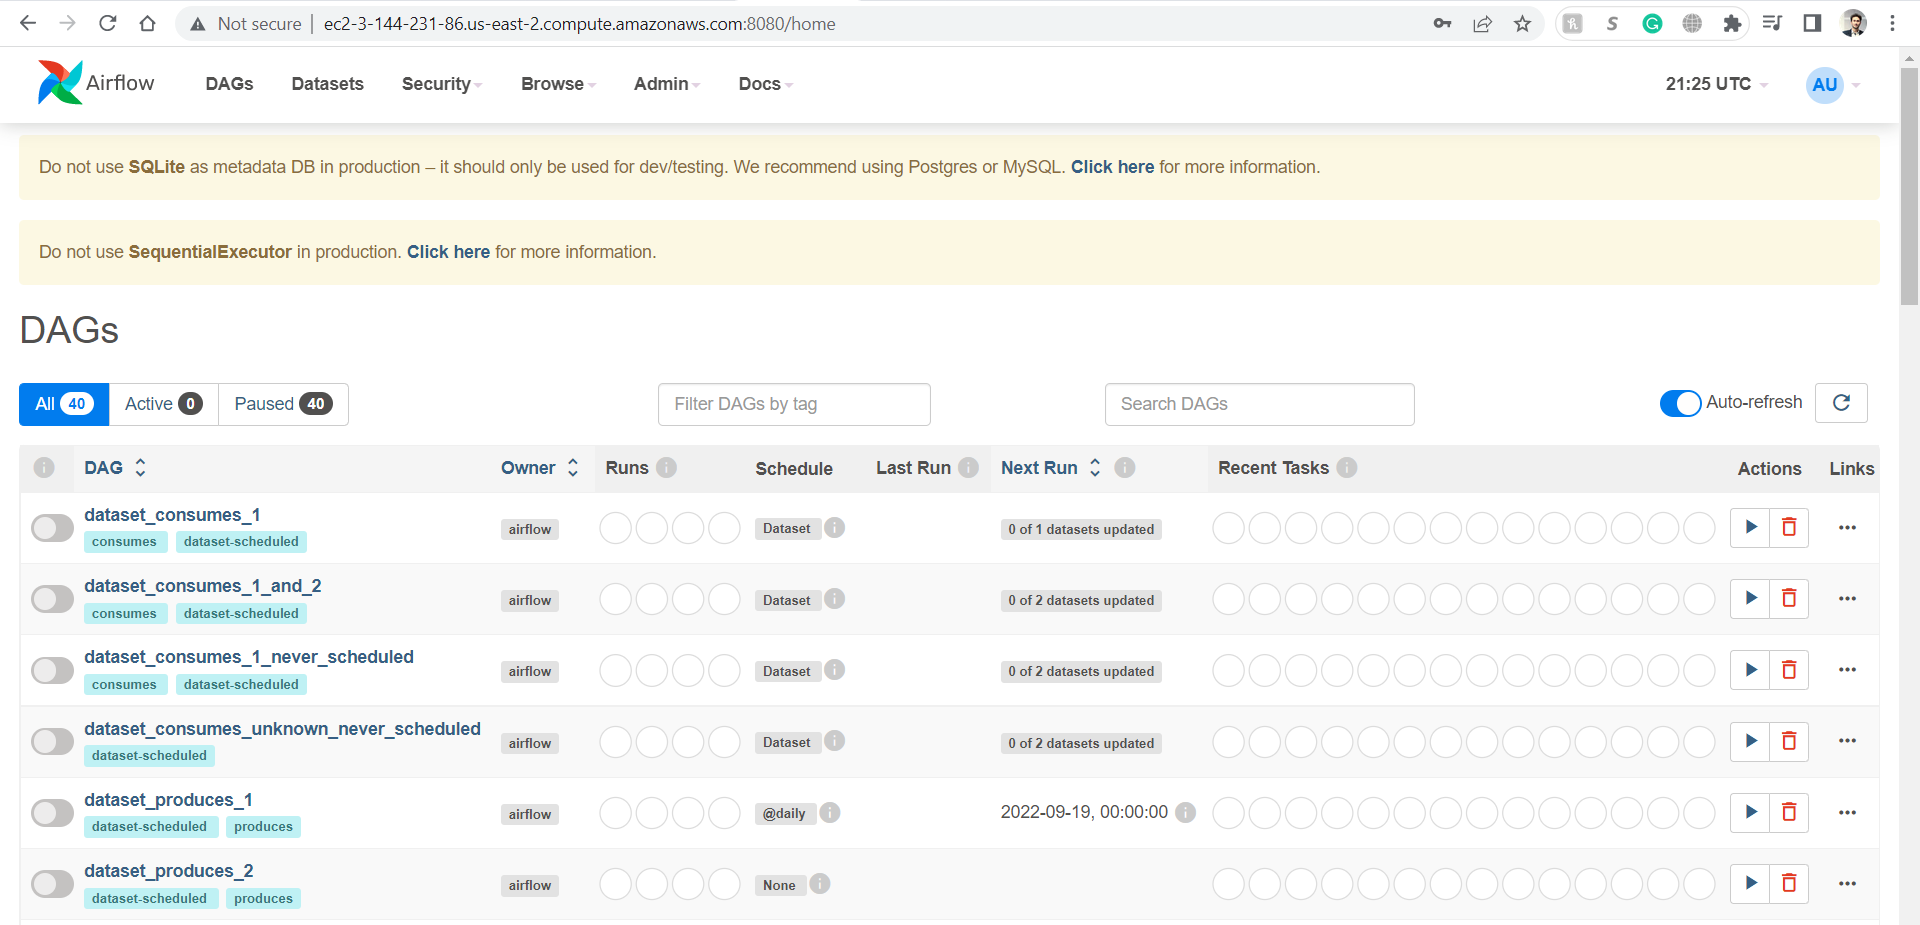

## Created S3 bucket to store data
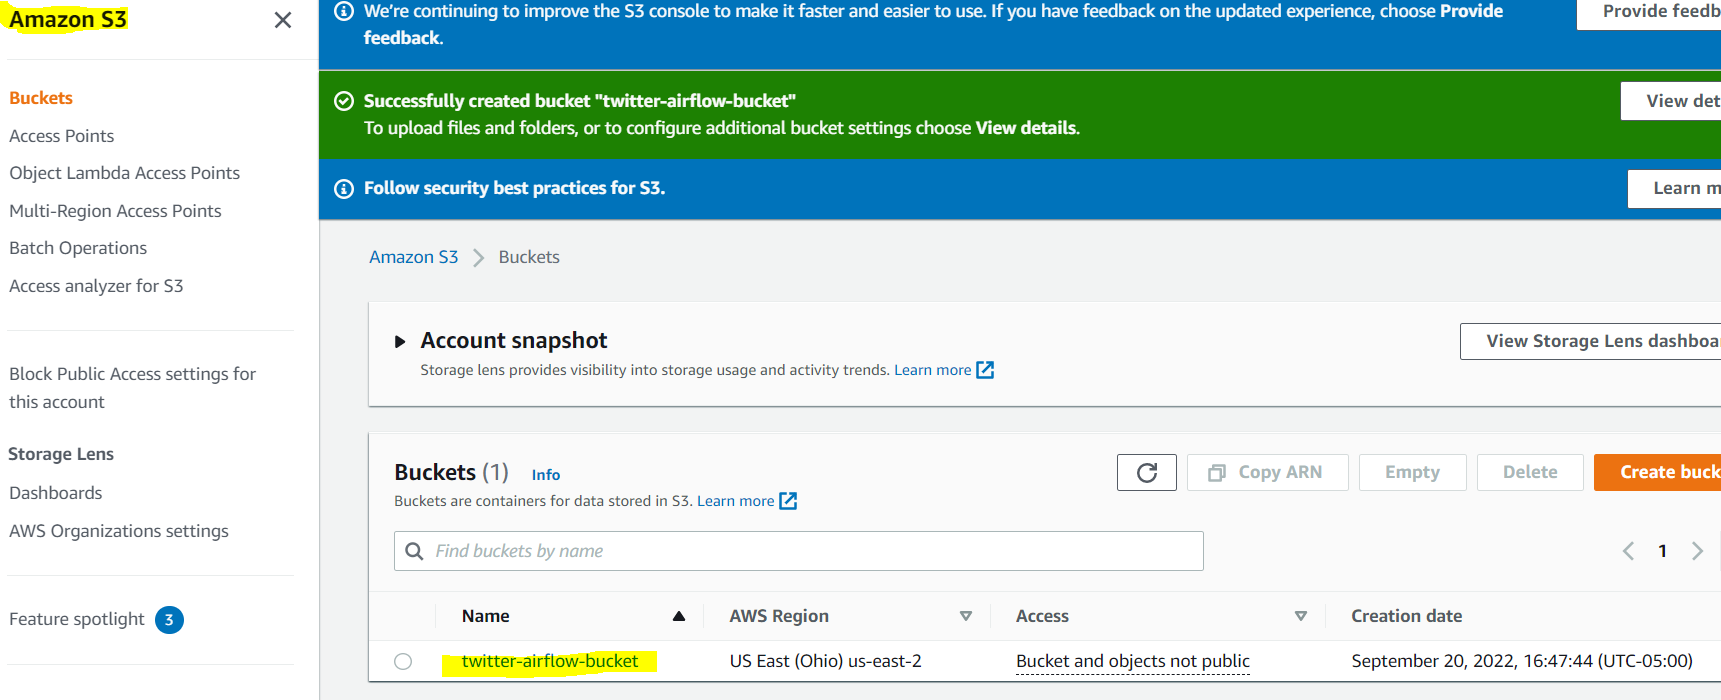

## Creating a fuction to access it from Airflow DAG Script (directed Acyclic Graph)

In [80]:
import tweepy
import pandas as pd
import json
from datetime import datetime
import s3fs

def run_twitter_etl():

    access_key = "QzzEvVEr7im2uDRarK6lfPCM6"
    access_secret = "nMgmYKW1SwhUWsGK6awpb67g04RgMjlZkTNME3qFkiIXz7SwjW"
    consumer_key = "1572249640845692931-PGVq0zQxsv7j0Cacu8ozRkKyD9sAj5"
    consumer_secret = "pVUtm7K9K3LN1aXkKlqLrhUv47HyQK16FD7gxf2GgRinH"


    # Twitter authentication
    auth = tweepy.OAuthHandler(access_key, access_secret)
    auth.set_access_token(consumer_key, consumer_secret)

    # # # Creating an API object
    api = tweepy.API(auth)
    tweets = api.user_timeline(screen_name='@elonmusk',
                            # 200 is the maximum allowed count
                            count=200,
                            include_rts = False,
                            # Necessary to keep full_text
                            # otherwise only the first 140 words are extracted
                            tweet_mode = 'extended'
                            )

    list = []
    for tweet in tweets:
        text = tweet._json["full_text"]

        refined_tweet = {"user": tweet.user.screen_name,
                        'text' : text,
                        'favorite_count' : tweet.favorite_count,
                        'retweet_count' : tweet.retweet_count,
                        'created_at' : tweet.created_at}

        list.append(refined_tweet)

    df = pd.DataFrame(list)
    df.to_csv('s3://twitter-airflow-bucket/twitterdata.csv')





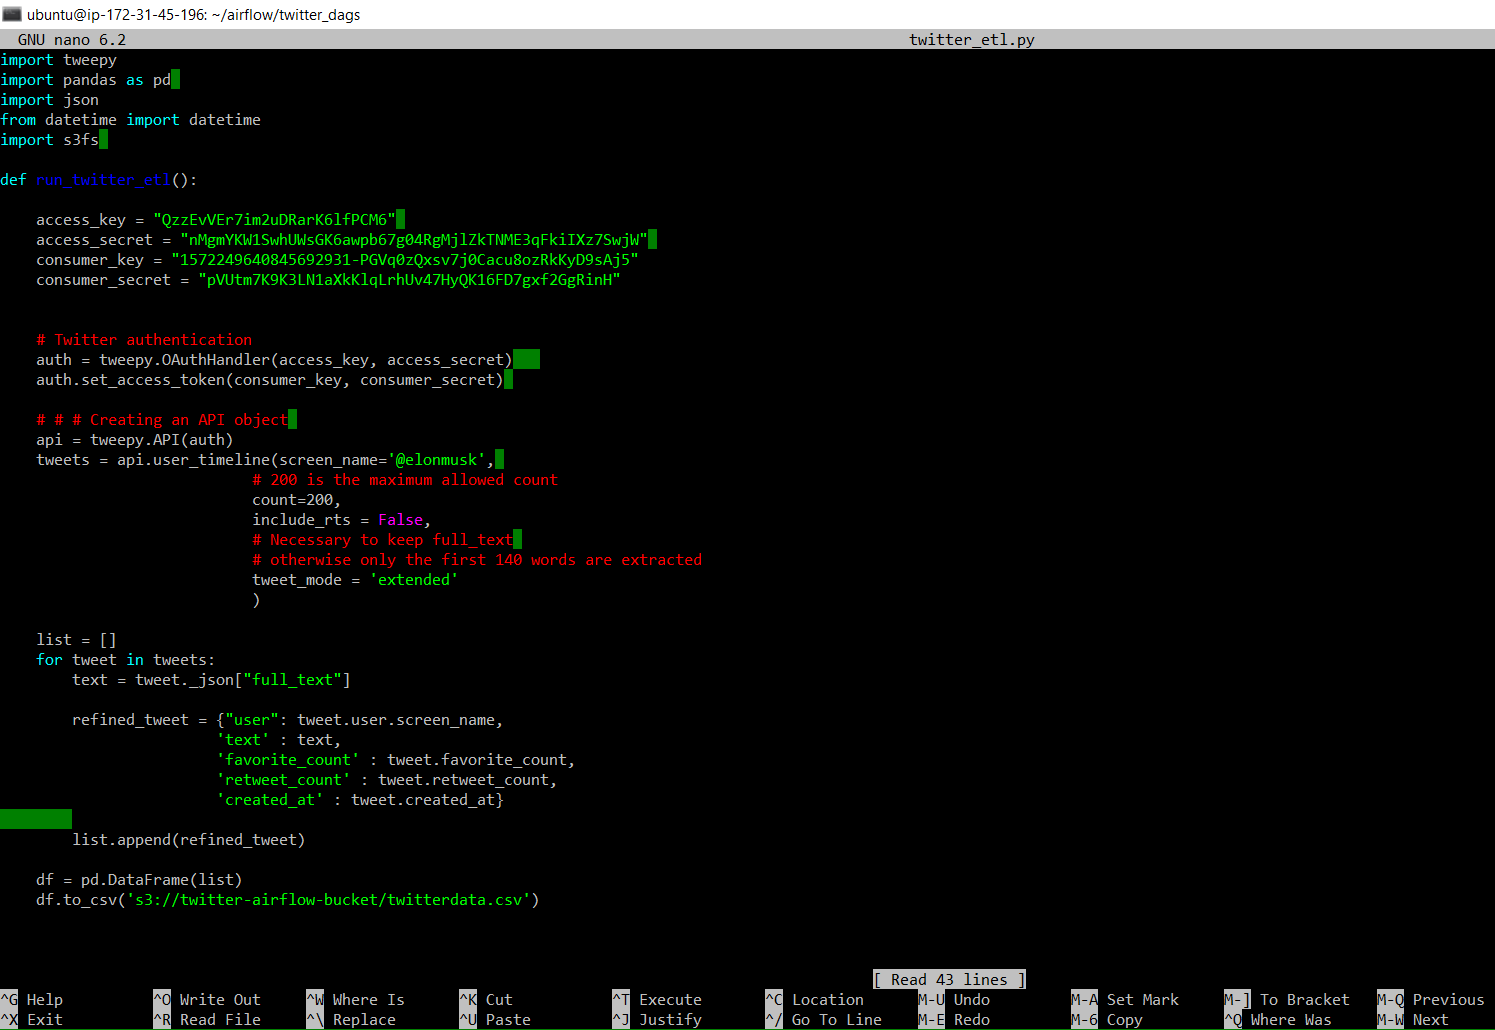

## Ran dag script on Airflow server hosted on EC2 to ingest live twitter data  

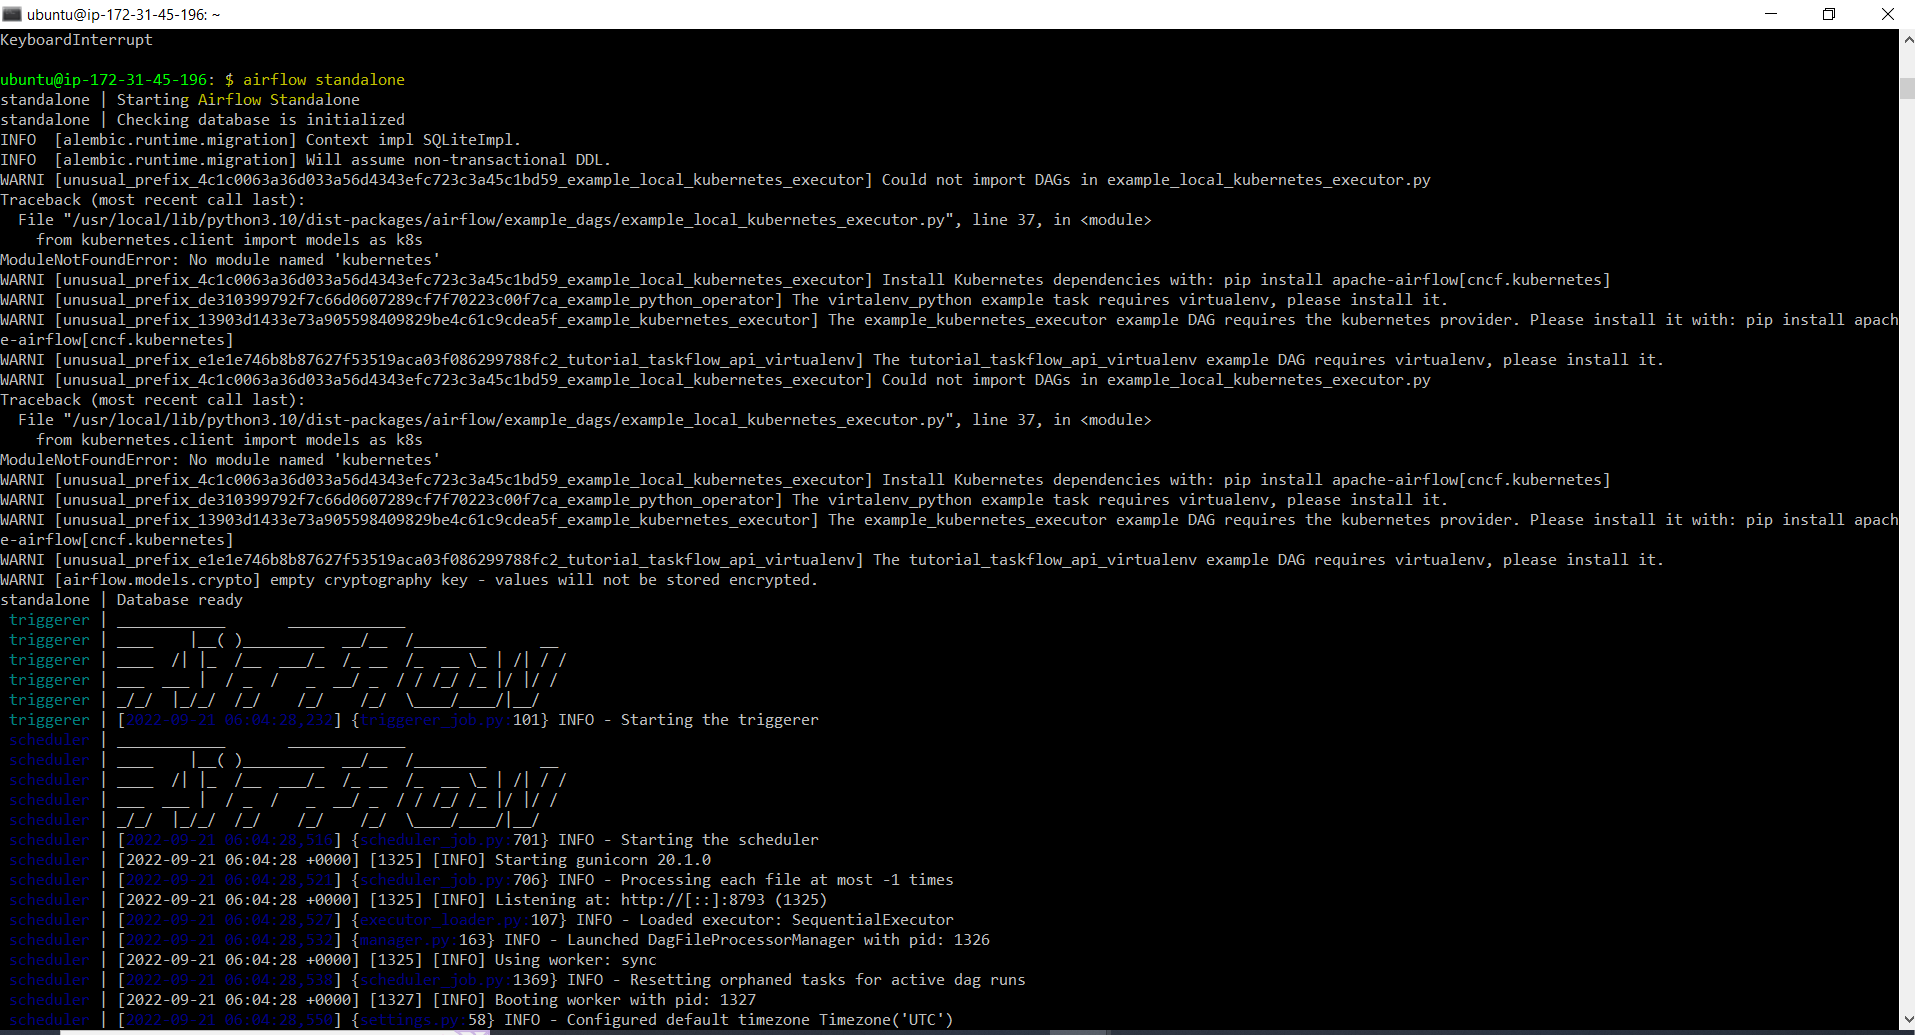

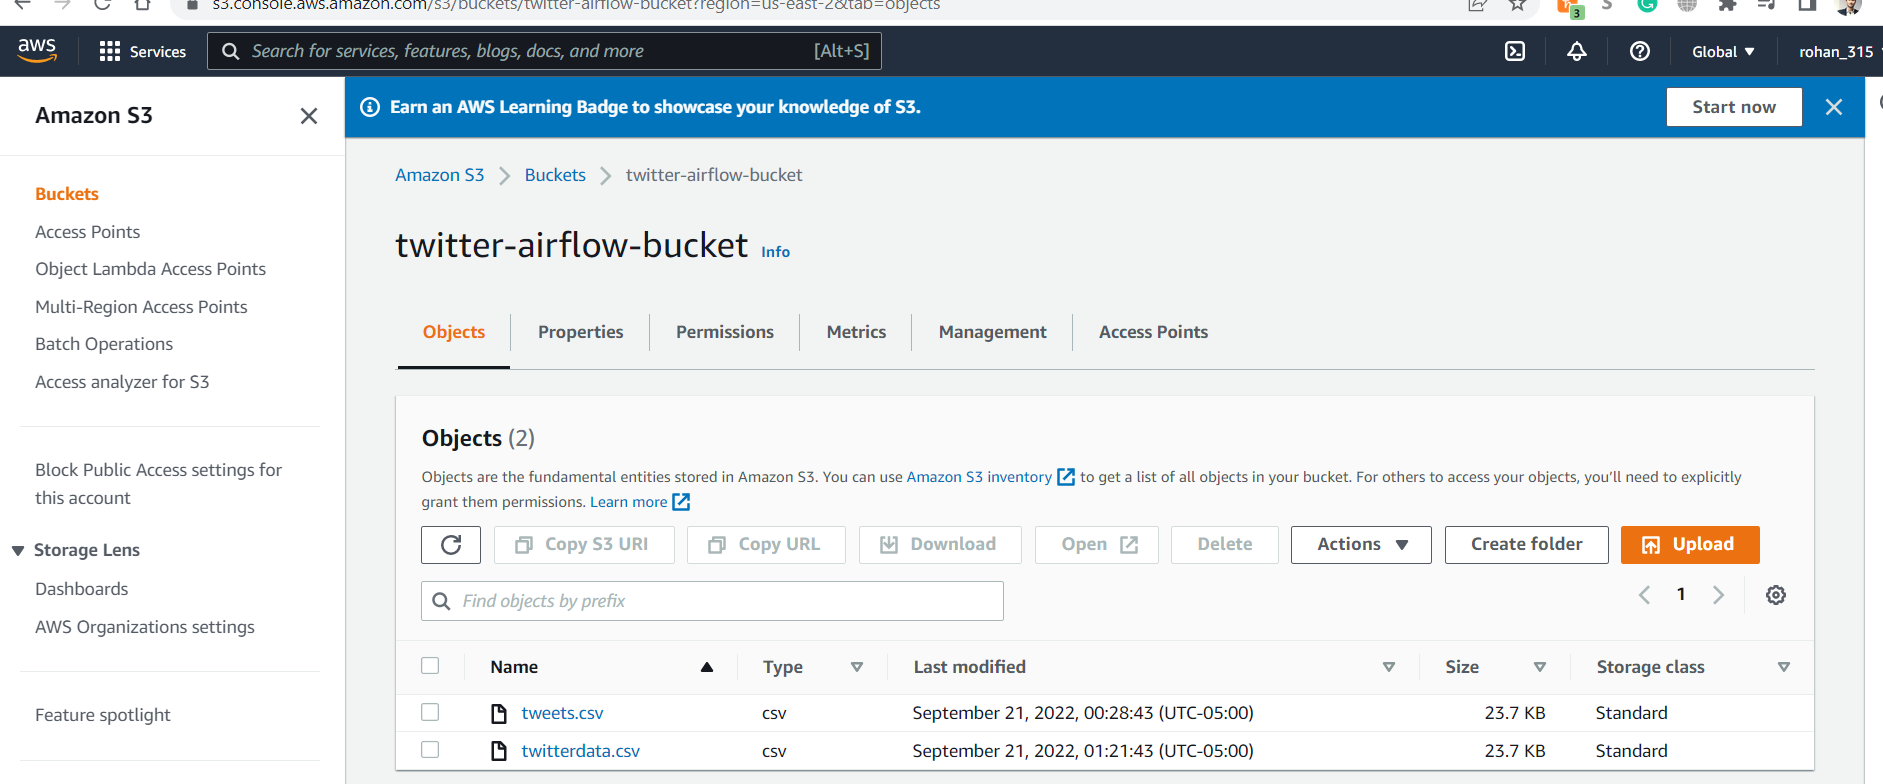


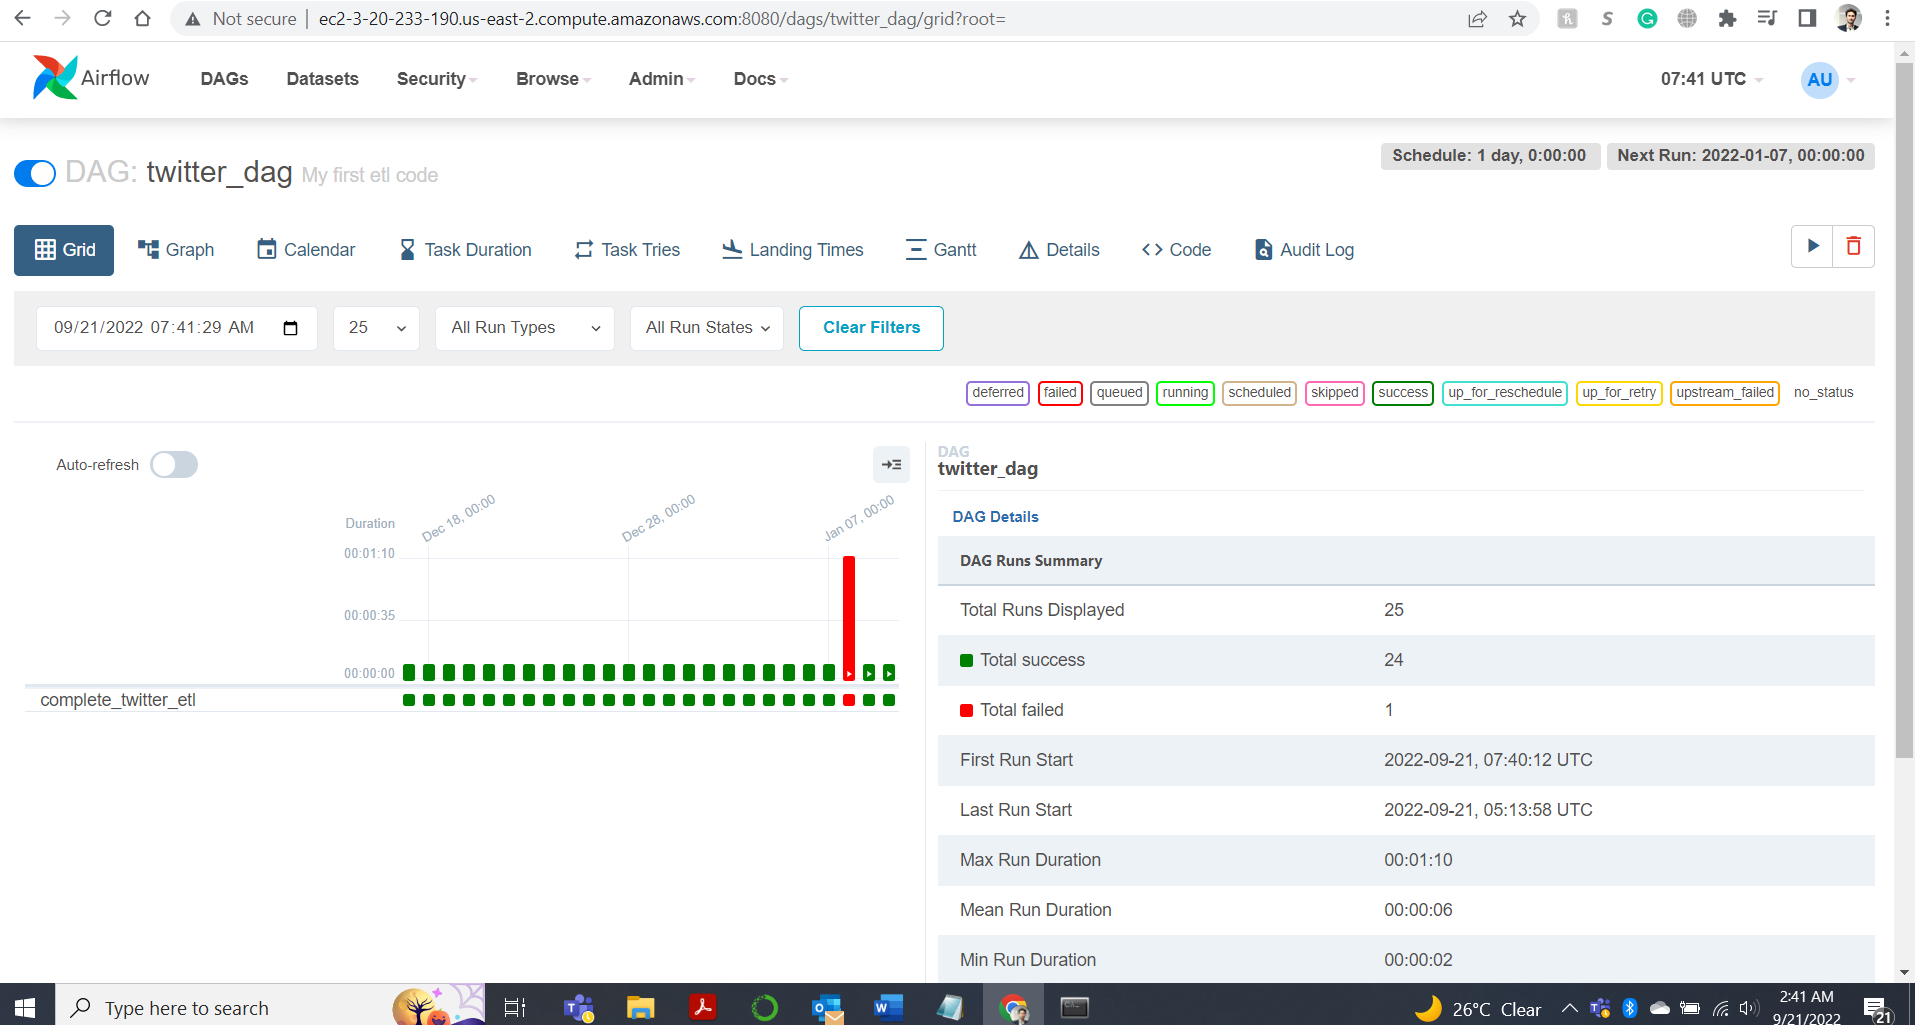

## Conclusion: 
### The pipeline is in place and the live data in S3 bucket can be further used for analytics or to feed it to other application.